In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [13]:
def read_complex_bytev2(filename, M=-1):
    data = np.fromfile(filename, dtype=np.dtype('B'), count=M)
    normdata=(np.array(data, dtype=float)-127)/128
    normdata.dtype=complex
    return normdata

In [14]:
x = read_complex_bytev2('capture1.bin')
fs = 2e6

In [16]:
N = 500000
bs = 256  # batch size
overlap = 128  # corresponds to maximum timeshift
nbatches = int(np.floor((N-overlap)/bs)) # number of batches

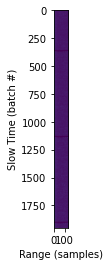

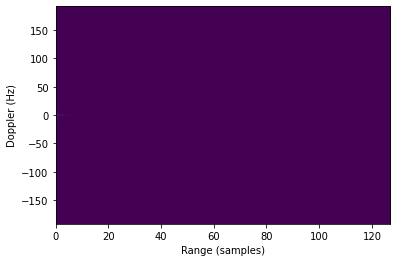

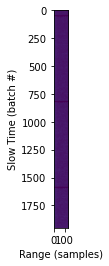

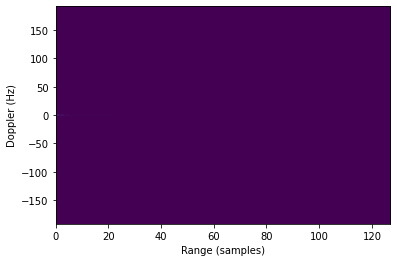

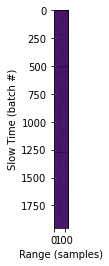

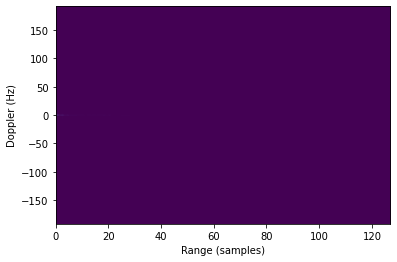

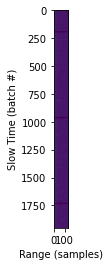

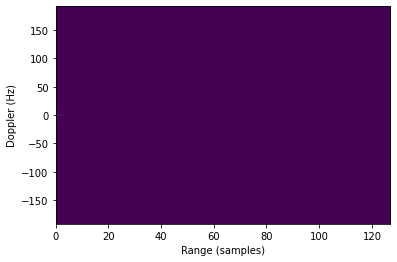

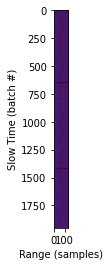

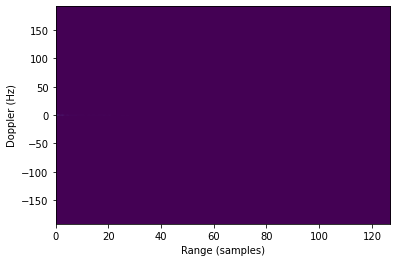

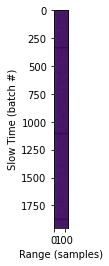

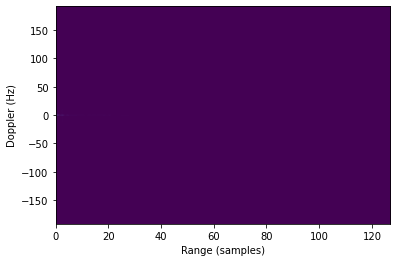

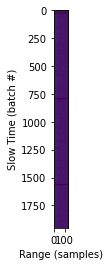

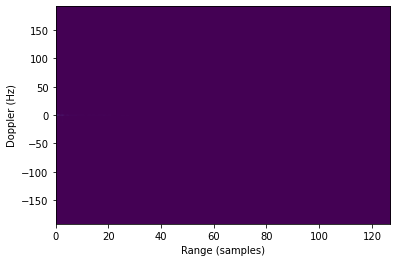

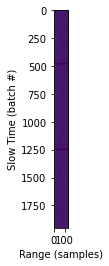

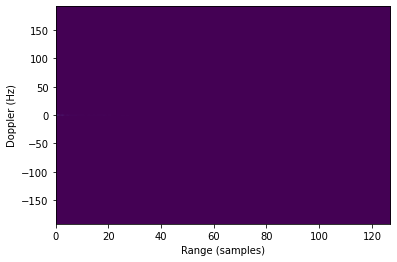

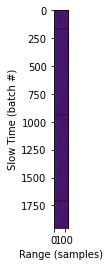

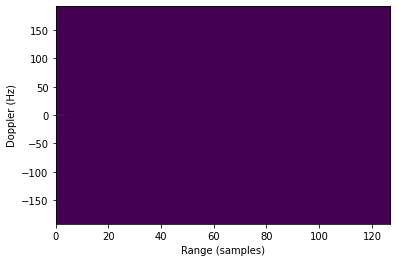

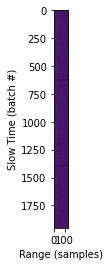

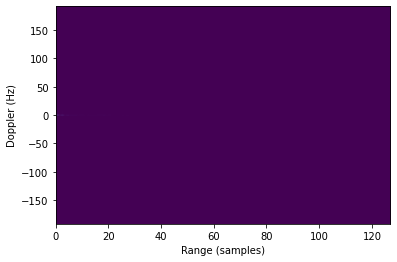

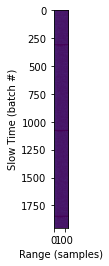

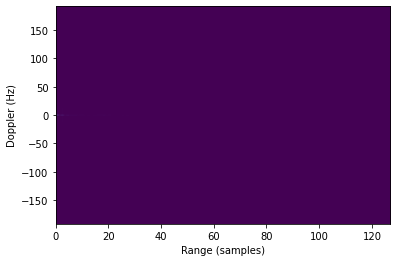

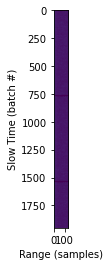

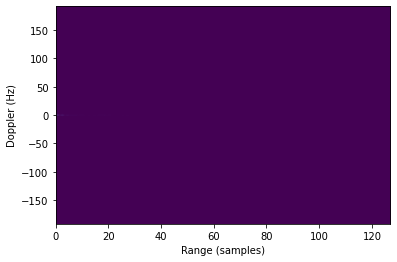

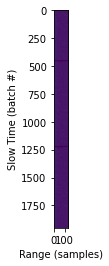

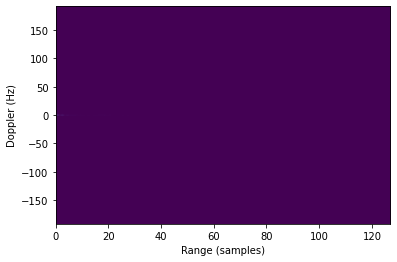

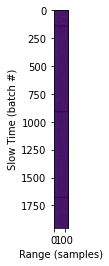

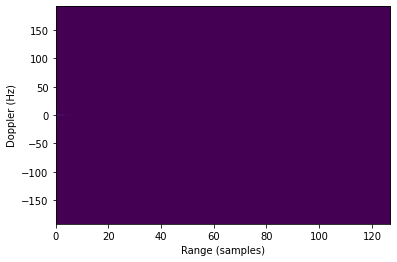

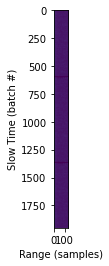

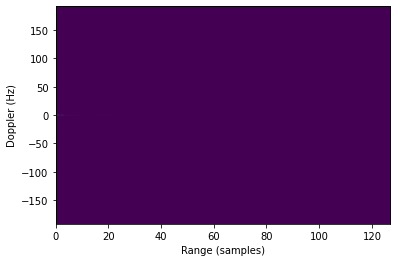

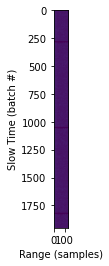

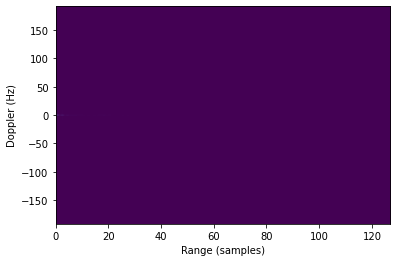

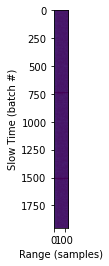

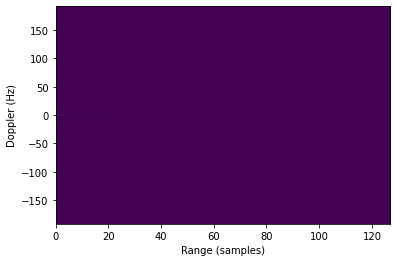

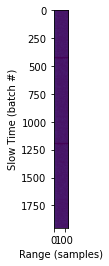

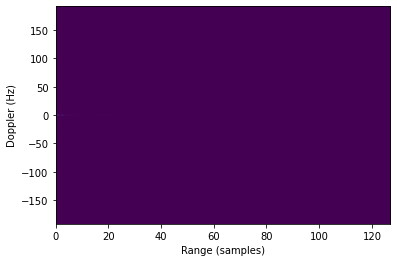

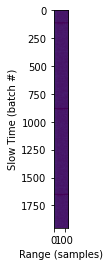

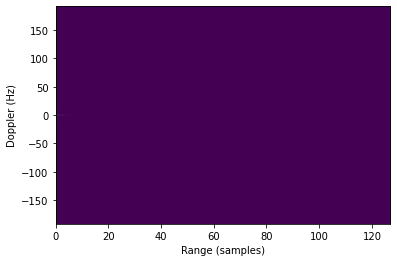

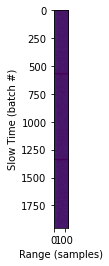

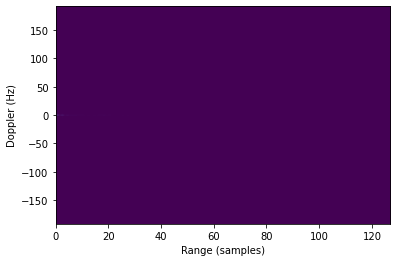

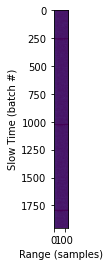

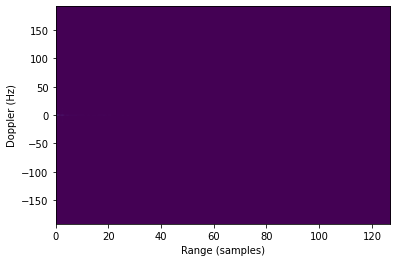

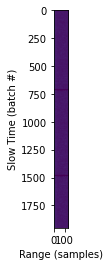

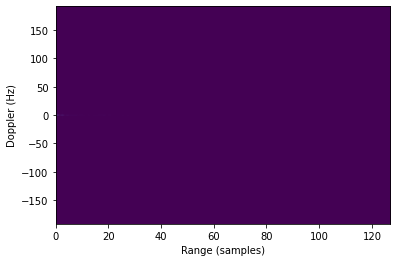

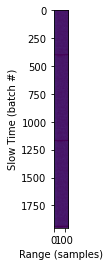

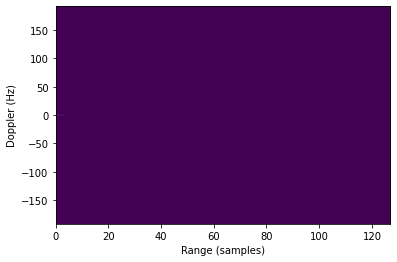

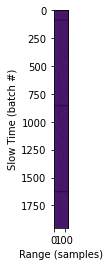

KeyboardInterrupt: 

In [17]:
# Algorithm 3:

figNum = 1
for i in np.arange(0, len(x), 80000):
    frame = (x[i: i + N]).copy()
    stmap = np.zeros((nbatches,overlap), dtype=complex)

    for si in range(nbatches):
        # reference signal
        sig1 = frame[si*bs: (si+1)*(bs)]
        # increase the lengh of sig1 by overlap
        sig1 = np.concatenate((sig1, np.zeros(overlap)), axis=0)

        # surveillance signal
        sig2 = frame[si*bs: (si+1)*(bs) + overlap]

        # correlation
        xc = np.fft.ifft(np.fft.fft(sig1) * np.conj(np.fft.fft(sig2)))
        stmap[si, :]  = xc[0:overlap]
    
    # plot the slow time correlation
    plt.imshow(np.abs(stmap))
    plt.xlabel('Range (samples)')
    plt.ylabel('Slow Time (batch #)')
    plt.show()

    # next step is to perform the fft for each column of of the slow time map
    stRDmap = np.zeros((nbatches, overlap), dtype=complex)
    for ri in np.arange(overlap):
	    stRDmap[:,ri] = np.fft.fftshift(np.fft.fft(stmap[:,ri]))
    
    sdata = np.shape(stRDmap)
    gridx = np.arange(0, sdata[1])
    gridy = (np.arange(0, nbatches)/nbatches - 0.5) *2*bs*0.75

    plt.imshow(np.abs(stRDmap), extent=[np.min(gridx), np.max(gridx), np.min(gridy), np.max(gridy)], aspect='auto')
    plt.xlabel('Range (samples)')
    plt.ylabel('Doppler (Hz)')
    plt.show()
    # plt.savefig('{}.png'.format(figNum), dpi = 360)
    # figNum = figNum + 1